# Labeled Faces In The Wild Deep Learning Classification


## Desription

The LFW (Labeled Faces In The Wild) dataset is composed of 5479 clases (different persons) for more than 13000 images.

## Initialization

In [ ]:
IMSIZE = [250, 250, 3]

## Load dataset

In [2]:
from sklearn.datasets import fetch_lfw_people

# Load dataset in color mode with centered on the faces
lfw_people = fetch_lfw_people(min_faces_per_person=10, color=True, resize=1.0,
                              slice_=(slice(70, 195), slice(78, 172)), funneled=True)

X = lfw_people.data
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]
n_samples, h, w, l = lfw_people.images.shape

# Reshape images 1D array to images matrix
X = X.reshape(-1, h, w, l).astype('uint8')

## Show images infos

In [3]:
print(target_names)
print(f"Image dimensions: {w}x{h}x{l}")
print(f"Number of classes: {n_classes}")
print(f"Number of samples: {n_samples}")

Image dimensions: 94x125x3
Number of classes: 158
Number of samples: 4324
['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo' 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie'
 'Ann Veneman' 'Anna Kournikova' 'Ari Fleischer' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill McBride' 'Bill Simon' 'Britney Spears' 'Carlos Menem'
 'Carlos Moya' 'Catherine Zeta-Jones' 'Charles Moose' 'Colin Powell'
 'Condoleezza Rice' 'David Beckham' 'David Nalbandian' 'Dick Cheney'
 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fidel Castro' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Gonzalo Sanchez de Lozada' 'Gordon Brown' 'Gray Davis' 'Guillermo Coria'
 'Halle Berry' 'Hamid Karzai' 'Hans Blix' 'Harrison Ford'
 'Hillary Clinton' 'Howard Dean' 'Hu Jintao' 'Hugo Chavez' 'Ian Thorpe'
 'Igor Ivanov' 'Jack Straw' 'Jackie Chan' 'Jacques Chirac'

## Show images

NameError: name 'X' is not defined

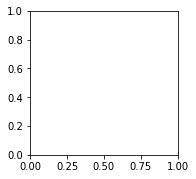

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i])
    plt.title(target_names[y[i]])
    plt.axis("off")
plt.show()

## Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building model


In [ ]:
from tensorflow import keras
from keras.optimizers import SGD
from keras import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.applications import ResNet50

batch_size = 8
epochs = 50
number_of_last_layers_trainable = 10
learning_rate = 0.001
nesterov = True
momentum = 0.9

preprocess_input = keras.applications.resnet.preprocess_input

model = ResNet50(
    input_shape=[h, w, 3],
    weights="imagenet",
    include_top=False,
    classes=n_classes,
)

for layer in model.layers[: number_of_last_layers_trainable]:
    layer.trainable = False

out = model.output

x = Flatten()(out)
x = Dense(n_classes, activation="softmax")(x)

model = Model(inputs=model.input, outputs=x)

opti = SGD(
    learning_rate=learning_rate,
    momentum=momentum,
    nesterov=nesterov,
)

# model.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opti, metrics=["accuracy"])
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

model.summary()

## Data augmentation

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.05,
    shear_range=10,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.20,
    preprocessing_function=preprocess_input,
)

train_generator = image_gen.flow(
    x=X_train,
    y=y_train,
    shuffle=True,
    batch_size=batch_size,
)

test_generator = image_gen.flow(
    x=X_test,
    y=y_test,
    shuffle=True,
    batch_size=batch_size,
)

## Training

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_accuracy", patience=2)
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=epochs,
                    steps_per_epoch=len(X_train) // batch_size,
                    validation_steps=len(X_test) // batch_size,
                    callbacks=[early_stop])

## Save model

In [ ]:
# model.save_weights("../weights/resnet50_lfw.h5")

## Prediction test

In [ ]:
image_index = 0
y_pred_mytest = model.predict(X[image_index:image_index + 9])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[image_index + i])
    text = f"Real: {target_names[y[image_index + i]]}\nPredicted: {target_names[np.argmax(y_pred_mytest[i])]}"
    plt.title(text)
    plt.axis("off")
plt.show()

In [298]:
print(f"Image dimensions: {w}x{h}x{l}")
print(f"Number of classes: {n_classes}")
print(f"Number of samples: {n_samples}")
print(target_names)

Image dimensions: 94x125x3
Number of classes: 7
Number of samples: 1288
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


## Show images

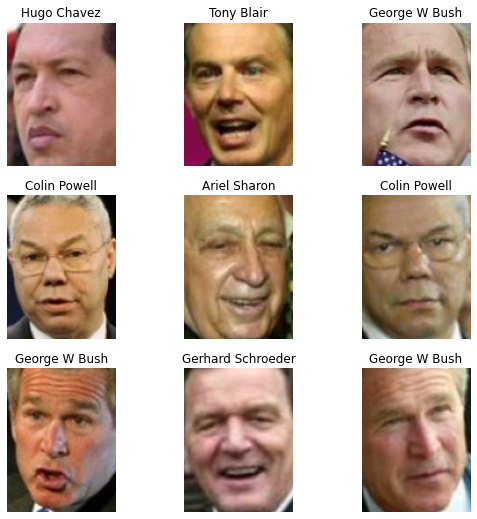

In [299]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i])
    plt.title(target_names[y[i]])
    plt.axis("off")
plt.show()

## Split dataset

In [300]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building model


In [301]:
from tensorflow import keras
from keras.optimizers import SGD
from keras import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.applications import ResNet50

batch_size = 8
epochs = 50
number_of_last_layers_trainable = 10
learning_rate = 0.001
nesterov = True
momentum = 0.9

preprocess_input = keras.applications.resnet.preprocess_input

model = ResNet50(
    input_shape=[h, w, 3],
    weights="imagenet",
    include_top=False,
    classes=n_classes,
)

for layer in model.layers[: number_of_last_layers_trainable]:
    layer.trainable = False

out = model.output

x = Flatten()(out)
x = Dense(n_classes, activation="softmax")(x)

model = Model(inputs=model.input, outputs=x)

opti = SGD(
    learning_rate=learning_rate,
    momentum=momentum,
    nesterov=nesterov,
)

# model.compile(loss="sparse_categorical_crossentropy", optimizer=opti, metrics=["accuracy"])

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opti, metrics=["accuracy"])
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 125, 94, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 131, 100, 3)  0           ['input_17[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 63, 47, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 63, 47, 64)   256         ['conv1_conv[0][0]']      

## Data augmentation

In [302]:
from keras_preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.05,
    shear_range=10,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.20,
    preprocessing_function=preprocess_input,
)

train_generator = image_gen.flow(
    x=X_train,
    y=y_train,
    shuffle=True,
    batch_size=batch_size,
)

test_generator = image_gen.flow(
    x=X_test,
    y=y_test,
    shuffle=True,
    batch_size=batch_size,
)

## Training

In [303]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_accuracy", patience=2)
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=epochs,
                    steps_per_epoch=len(X_train) // batch_size,
                    validation_steps=len(X_test) // batch_size,
                    callbacks=[early_stop])

Epoch 1/50
128/128 [==============================] - 13s 60ms/step - loss: 4.5825 - accuracy: 0.5166 - val_loss: 50.5340 - val_accuracy: 0.4648
Epoch 2/50
128/128 [==============================] - 6s 49ms/step - loss: 1.6430 - accuracy: 0.6546 - val_loss: 2.1601 - val_accuracy: 0.6602
Epoch 3/50
128/128 [==============================] - 7s 51ms/step - loss: 0.5170 - accuracy: 0.8297 - val_loss: 0.5841 - val_accuracy: 0.8281
Epoch 4/50
128/128 [==============================] - 7s 52ms/step - loss: 0.4610 - accuracy: 0.8699 - val_loss: 0.3738 - val_accuracy: 0.8867
Epoch 5/50
128/128 [==============================] - 7s 54ms/step - loss: 0.2128 - accuracy: 0.9344 - val_loss: 0.2400 - val_accuracy: 0.9102
Epoch 6/50
128/128 [==============================] - 8s 60ms/step - loss: 0.1200 - accuracy: 0.9560 - val_loss: 0.1691 - val_accuracy: 0.9492
Epoch 7/50
128/128 [==============================] - 7s 56ms/step - loss: 0.1117 - accuracy: 0.9687 - val_loss: 0.1393 - val_accuracy: 0.94

## Save model

In [304]:
# model.save_weights("../weights/resnet50_lfw.h5")

## Prediction test

In [307]:
image_index = 0
y_pred_mytest = model.predict(X[image_index:image_index + 9])

1/1 [==============================] - 0s 26ms/step


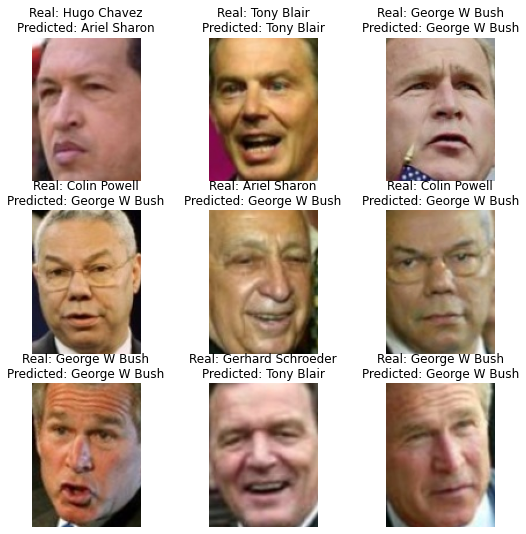

In [308]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[image_index + i])
    text = f"Real: {target_names[y[image_index + i]]}\nPredicted: {target_names[np.argmax(y_pred_mytest[i])]}"
    plt.title(text)
    plt.axis("off")
plt.show()